## Bet Better

This is a simple game. A card is drawn from a deck randomly. If it is a letter card (A,K,Q,J), you win. If it is a number card (2-10), then you lose. Choose your own winning and losing bets. Don't be greedy! 

In the block below, choose your winning bet as the variable A_pays and your losing bet as the variable B_pays

('Hello B! Your total profit was ', -969)
Oops! :( No wonder you lost. Your bet was bad
(' You pay A', 969, 'rupees.')
Your cards were
['4' 'Q' '9' '5' '7' 'Q' 'A' 'Q' 'A' '3' '6' '8' 'J' 'K' '8' 'Q' '5' 'Q'
 '10' '6' '8' 'K' '7' '3' 'Q' '6' '4' '3' '10' 'K' '3' '9' '6' '4' '9' '8'
 '4' '6' '6' 'Q' 'K' '10' 'Q' '9' '4' '4' '6' '6' '2' '8' '6' 'A' 'Q' '5'
 '8' '10' 'A' 'K' '3' '4' 'Q' '10' '6' '2' '4' 'A' '5' '6' '7' '4' '3' 'A'
 '7' 'Q' '9' '3' '7' '6' '6' '10' '6' '4' '9' '3' '9' '5' '6' '5' '10' '8'
 '4' 'Q' '4' '3' 'J' 'A' '2' '5' 'A' '5' '7' 'K' '9' 'J' 'J' 'K' 'A' '5'
 '5' '6' '5' '7' 'J' 'Q' 'J' '8' '8' 'A' '3' 'K' 'Q' '9' 'A' 'A' '8' 'J'
 '4' 'A' '6' 'Q' 'J' '7' 'Q' '4' '2' '9' '8' '4' 'A' '9' '4' 'Q' 'A' '4'
 '6' '7' '2' '5' '5' 'A' 'K' '7' '4' '4' '3' '2' '7' '10' '5' 'Q' '8' '9'
 '10' '2' '7' '8' '4' '4' '9' '9' '3' '2' 'K' '3' '5' '5' '3' 'Q' '2' '6'
 '10' '7' '7' '5' '7' 'Q' '9' '10' '10' '6' '6' '8' '10' '7' '8' '7' '5'
 'J' 'A' '10' '3' '6' '5' '10' '10' '3' '9' '2' '6' '

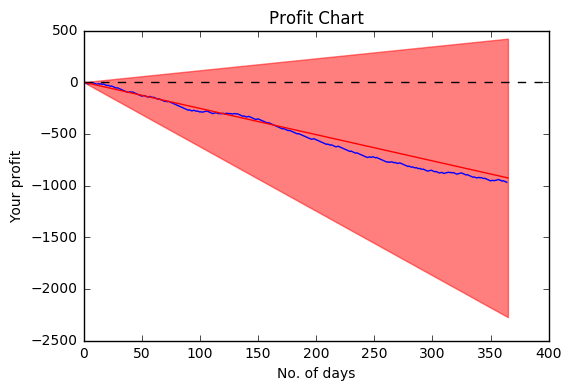

In [18]:
A_pays = 3 ## Winning bet
B_pays = 5 ## Losing bet
play()

In [17]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import future

def play(N_days=365):
    if A_pays<0 or B_pays<0:
        print("Sorry, but the bet amounts cannot be negative")
        return None
    if A_pays*1./B_pays>5:
        print("That's way too greedy. Try a different amount.")
        return None
    
    deck = ['A','2','3','4','5','6','7','8','9','10','J','Q','K']
    letters = ['A','K','Q','J']
    good_strategy = (A_pays*len(letters)-B_pays*(len(deck)-len(letters)))>0

    cards = np.array(deck)[np.random.randint(low=0,high=13,size=N_days)]
    wins = cards>='A' ## declare letter cards as win based on ASCII code
    profit = A_pays*wins - B_pays*(~wins)
    total_profit = profit.sum()
    
    def plot_expectation_risk(N):
        c = 'g' if good_strategy else 'r'
        x = [0,N]
        mean = (4*A_pays/13.-9*B_pays/13.)*N
        plt.plot(x,[0,mean],color=c,ls='-')
        var = ((A_pays*N)**2)*4/13. + ((B_pays*N)**2)*9/13. - mean**2
        std = np.sqrt(var)
        plt.fill_between(x,[0,mean+std],[0,mean-std],color=c,alpha=0.5)
        #plt.fill_between(x,[0,mean+3*std],[0,mean-3*std],color=c,alpha=0.2)
    
    plt.plot(np.cumsum(profit))
    plt.axhline(0,color='k',ls='--')
    plt.xlabel('No. of days')
    plt.ylabel("Your profit")
    plt.title('Profit Chart')
    plot_expectation_risk(N_days)

    print("Hello B! Your total profit was ", total_profit)
    if total_profit<0:
        if good_strategy:
            print("Oops! :( Your bet was good, but bad luck. Better luck next time.")
        else:
            print("Oops! :( No wonder you lost. Your bet was bad")
        print(" You pay A", -total_profit, "rupees.")
    else:
        if good_strategy:
            print("Congrats! You won. Thanks to your good bet.")
        else:
            print("Wow! Your bet was bad, but luck was on your side.")
        print("A pays you", total_profit, "rupees.")
    print("Your cards were")
    print cards
    #return cards, profit